In [1]:
!pip install tensorflow opencv-python matplotlib


In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
data_dir = 'drive/My Drive/data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Ensure it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                # Read the image using OpenCV
                img = cv2.imread(image_path)
                if img is None:
                    print(f"Failed to load image {image_path}. Removing it.")
                    os.remove(image_path)
                    continue

                # Check the image header type
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print(f"Image not in ext list: {image_path}. Removing it.")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}: {e}")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data = tf.keras.utils.image_dataset_from_directory('drive/My Drive/data')

Found 153 files belonging to 2 classes.


In [10]:
len(data)

5

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

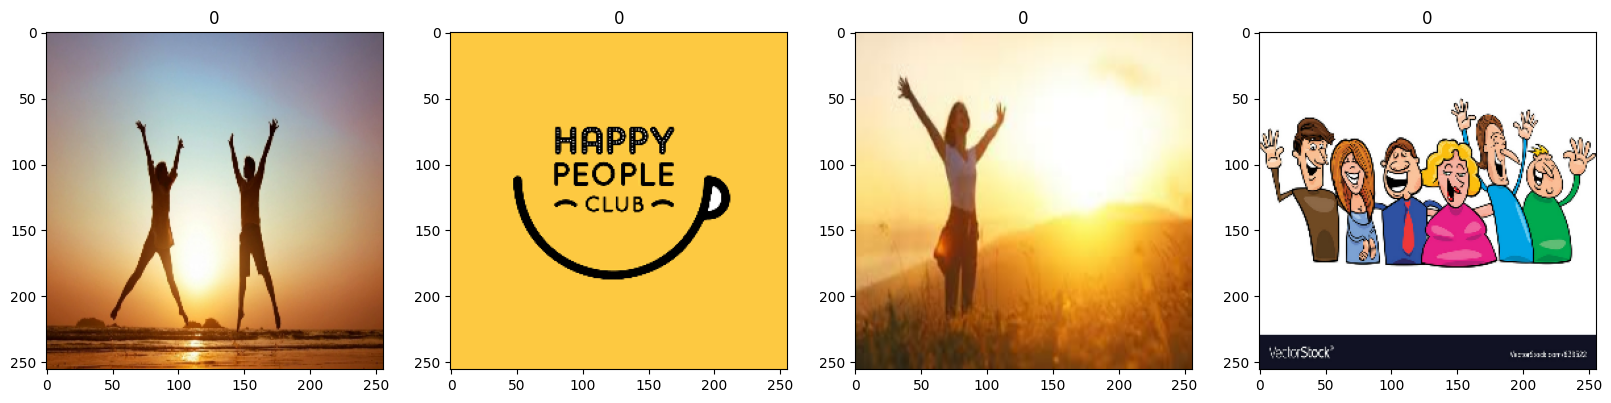

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.77254903, 0.33333334, 0.32941177],
          [0.7816483 , 0.3353554 , 0.32671568],
          [0.8230086 , 0.34454656, 0.31446078],
          ...,
          [0.68308824, 0.6984069 , 0.68477327],
          [0.69534314, 0.7045343 , 0.6924326 ],
          [0.69803923, 0.7058824 , 0.69411767]],
 
         [[0.7752451 , 0.32591912, 0.32637867],
          [0.78501046, 0.3288969 , 0.32455146],
          [0.8293986 , 0.34243235, 0.31624588],
          ...,
          [0.6768957 , 0.69271195, 0.6816138 ],
          [0.68704426, 0.6966014 , 0.6871668 ],
          [0.68927693, 0.69745713, 0.68838847]],
 
         [[0.7875    , 0.29221815, 0.3125919 ],
          [0.8002932 , 0.2995402 , 0.314714  ],
          [0.85844415, 0.33282232, 0.32435998],
          ...,
          [0.6487477 , 0.66682583, 0.6672526 ],
          [0.64932215, 0.6605428 , 0.6632315 ],
          [0.6494485 , 0.65916055, 0.66234684]],
 
         ...,
 
         [[0.2963848 , 0.26145834, 0.36302084],
          [0.30086

In [16]:
batch[0].max()

255.0

In [17]:
batch[0].min()

0.0

In [18]:
scaled_data = data.map(lambda x,y: ((x/255),y))

In [19]:
scaled_data.as_numpy_iterator().next()

(array([[[[3.8908112e-03, 2.5990005e-03, 1.2543253e-04],
          [3.9133984e-03, 2.5908304e-03, 1.1485967e-04],
          [3.9061899e-03, 2.5836218e-03, 1.0765091e-04],
          ...,
          [3.8908112e-03, 2.5990005e-03, 1.3840832e-04],
          [3.9071511e-03, 2.5908304e-03, 1.3119954e-04],
          [3.9167628e-03, 2.5990005e-03, 1.2543253e-04]],
 
         [[3.8908112e-03, 2.5990005e-03, 1.2543253e-04],
          [3.9061899e-03, 2.5836218e-03, 1.0765091e-04],
          [3.9061899e-03, 2.5836218e-03, 1.0765091e-04],
          ...,
          [3.8908112e-03, 2.5990005e-03, 1.3840832e-04],
          [3.9071511e-03, 2.5908304e-03, 1.3119954e-04],
          [3.9167628e-03, 2.5990005e-03, 1.2543253e-04]],
 
         [[3.9167628e-03, 2.5990005e-03, 1.2543253e-04],
          [3.8917724e-03, 2.5836218e-03, 1.0765091e-04],
          [3.9061899e-03, 2.5836218e-03, 1.0765091e-04],
          ...,
          [3.8908112e-03, 2.5990005e-03, 1.3840832e-04],
          [3.9071511e-03, 2.5908304e-

In [20]:
train_size = int(len(scaled_data)*0.7)
val_size = int(len(scaled_data)*0.2)
test_size = int(len(scaled_data)*0.1)

train_data = scaled_data.take(train_size)
val_data = scaled_data.skip(train_size).take(val_size)
test_data = scaled_data.skip(train_size + val_size).take(test_size)

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(32, (3, 3), 1, activation='relu', padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3),1 , padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), 1, padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train_data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

NameError: name 'val' is not defined

# New Section